# Bibliotecas

In [144]:
# Data Wrangling
import pandas as pd
import numpy as np

#Visualização
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.regressor import residuals_plot, prediction_error

#Validação de modelos
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

#Pré-processamento / pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Preprocessamento com Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

#Importando os modelos
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import pickle

# Esse comando (disponível da versão 1.2 em diante do scikit learn), 
# transforma as saídas de um numpy array para um array pandas, que contém o número das colunas
from sklearn import set_config
set_config(transform_output='pandas')

# Funções

In [103]:
def get_metrics(y_true, y_pred):
    dict_metrics = {
        'R2': metrics.r2_score(y_true,y_pred),
        'MAE': metrics.mean_absolute_error(y_true,y_pred),
        'MAPE': metrics.mean_absolute_percentage_error(y_true,y_pred),
        #'RMSE': metrics.root_mean_squared_error(y_true,y_pred)
    }
    return dict_metrics

In [5]:
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='age', ylabel='charges'>

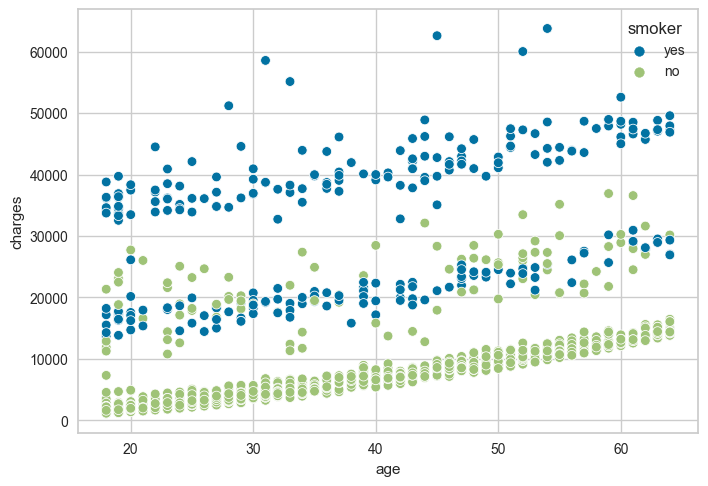

In [8]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

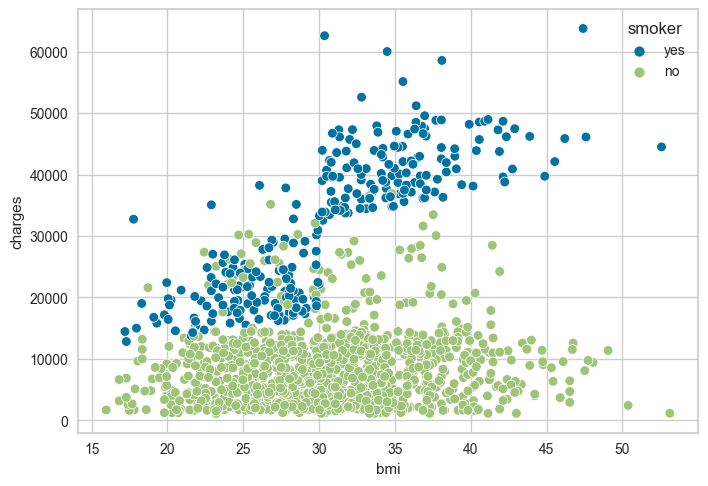

In [9]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')

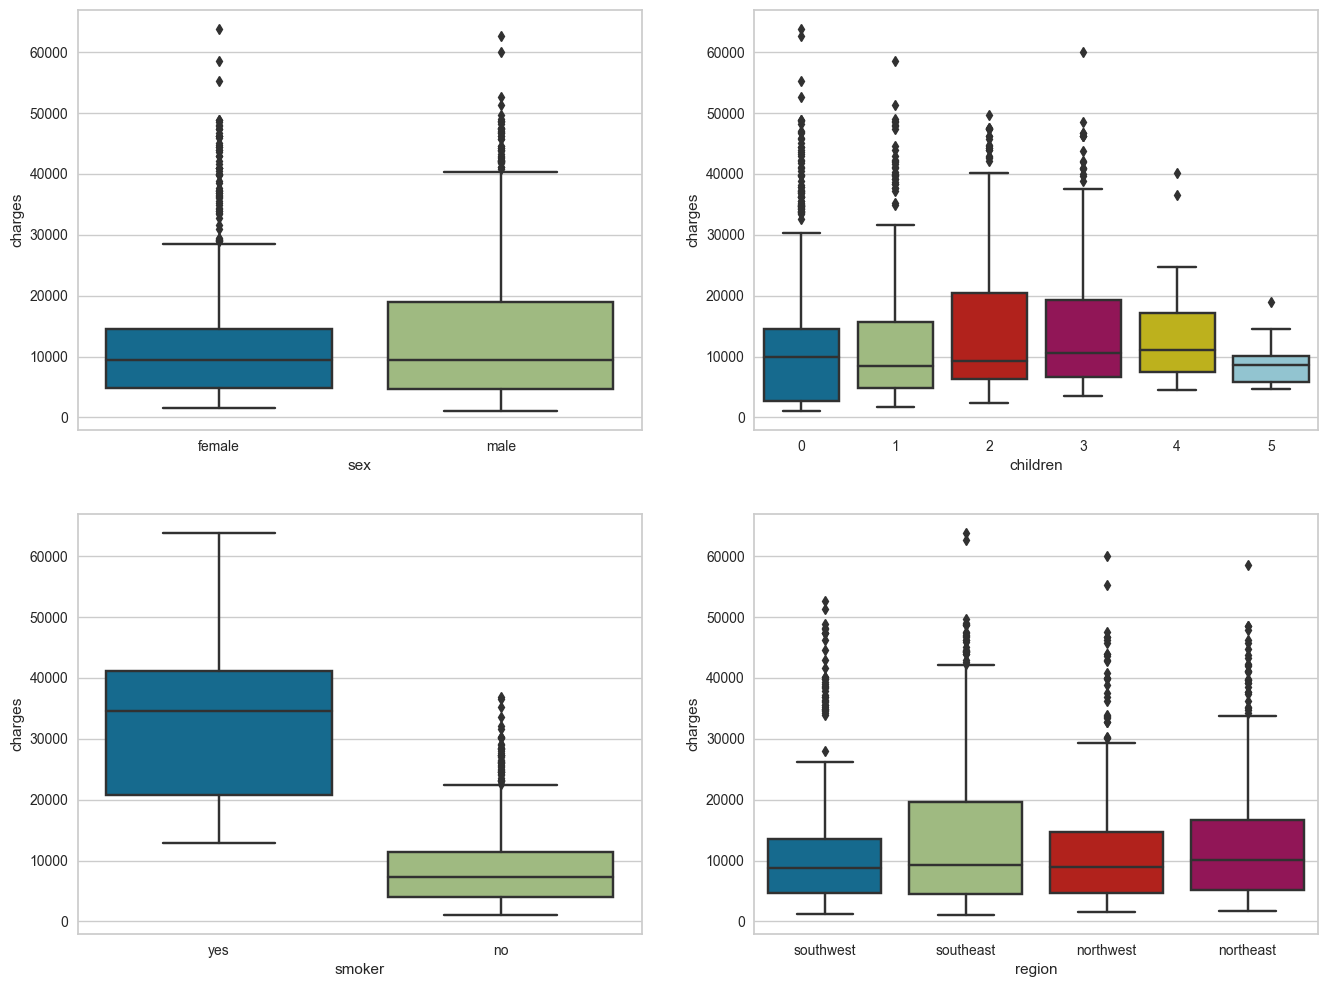

In [10]:
cat_plot_cols = ['sex', 'children', 'smoker', 'region']

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
for col, ax in zip(cat_plot_cols, axes.flatten()):
    sns.boxplot(x=col, y='charges', data=df, ax=ax)

In [11]:
df.corr()

C:\Users\joseh\AppData\Local\Temp\ipykernel_13748\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


C:\Users\joseh\AppData\Local\Temp\ipykernel_13748\183197628.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfc = df.corr()


<Axes: >

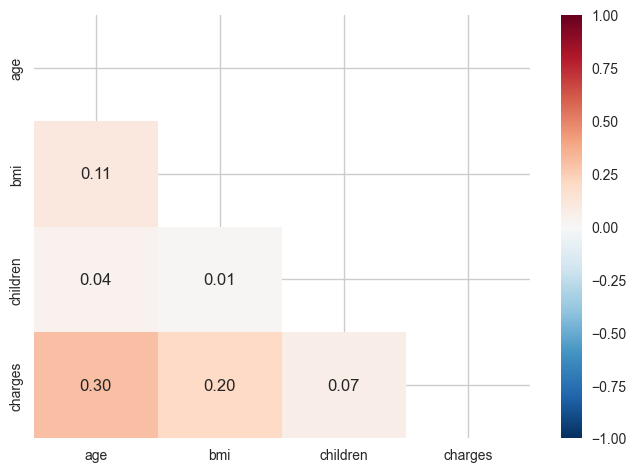

In [12]:
dfc = df.corr()
mask = np.zeros(dfc.shape).astype(bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(dfc, annot=True, fmt='.2f', vmin=-1, center=0, vmax=1, cmap='RdBu_r', mask=mask)

C:\Users\joseh\AppData\Local\Temp\ipykernel_13748\716991898.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfc_f = df_fumantes.corr()
C:\Users\joseh\AppData\Local\Temp\ipykernel_13748\716991898.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfc_nf = df_nao_fumantes.corr()


Text(0.5, 1.0, 'Fumantes')

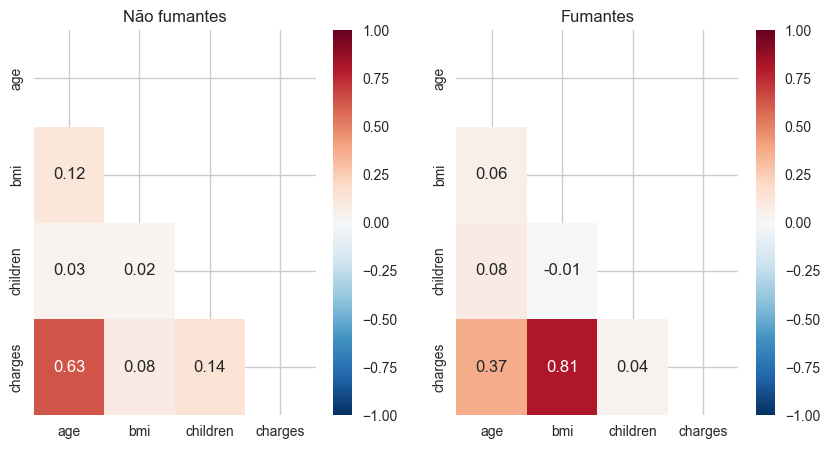

In [19]:
df_fumantes = df[df['smoker']=='yes']
dfc_f = df_fumantes.corr()

mask = np.zeros(dfc_f.shape).astype(bool)
mask[np.triu_indices_from(mask)] = True

df_nao_fumantes = df[df['smoker']=='no']
dfc_nf = df_nao_fumantes.corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.heatmap(dfc_nf, annot=True, fmt='.2f', vmin=-1, center=0, vmax=1, cmap='RdBu_r', mask=mask, ax=ax[0])
ax[0].set_title('Não fumantes')

sns.heatmap(dfc_f, annot=True, fmt='.2f', vmin=-1, center=0, vmax=1, cmap='RdBu_r', mask=mask, ax=ax[1])
ax[1].set_title('Fumantes')

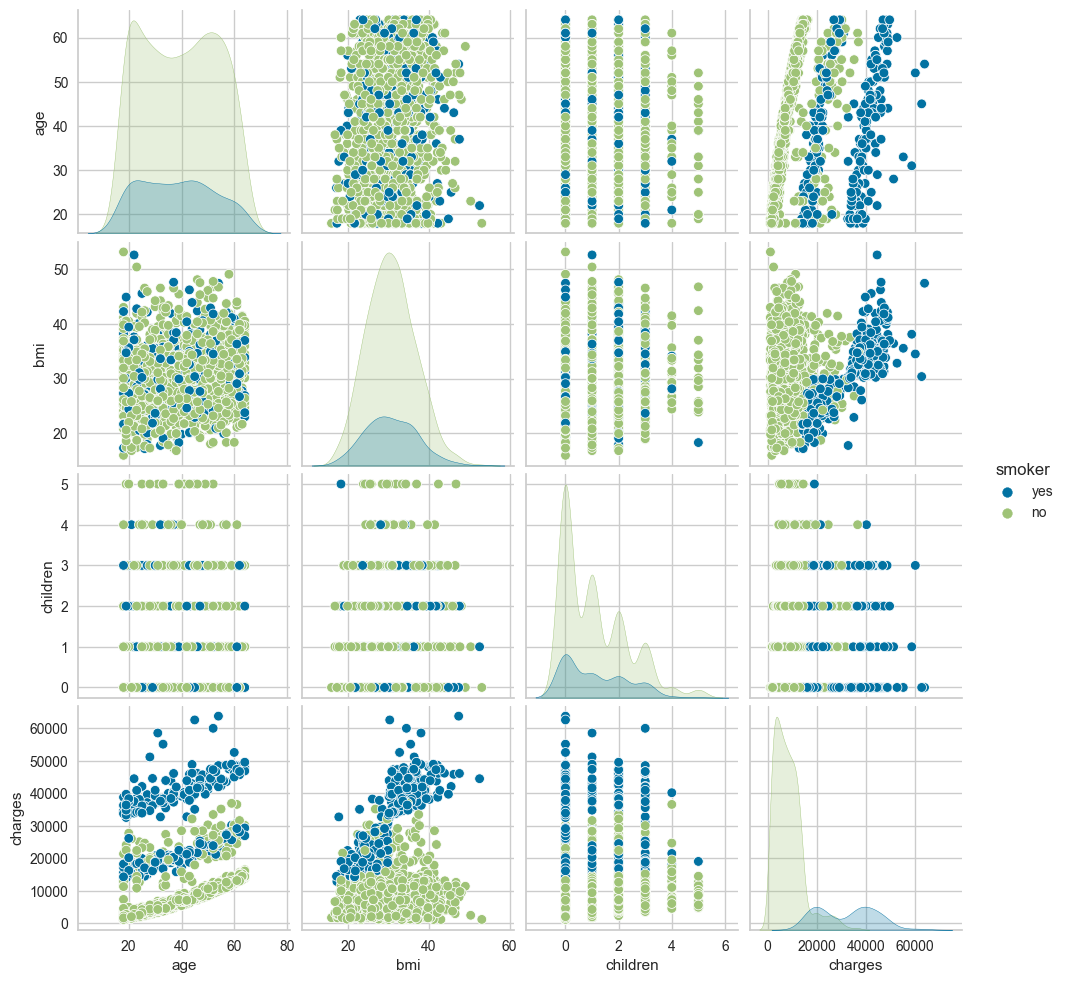

In [31]:
sns.pairplot(df, hue='smoker')


# Modeling

In [42]:
X = df.drop(columns=(['charges']))
y = df['charges']

In [ ]:
categorical_features = ['sex', 'smoker', 'region']
numerical_features = [col for col in list(X.columns) if col not in categorical_features]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023)

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean')),
    ('Scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='most_frequent')),
    ('Encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('Numeric', numerical_transformer, numerical_features),
    ('Category', categorical_transformer, categorical_features)
])

preprocessor

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('Imputer', SimpleImputer()),
                                                 ('Scaler', MinMaxScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('Category',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['sex', 'smoker', 'region'])])

In [52]:
preprocessor.fit_transform(X_train).head()

,Numeric__age,Numeric__bmi,Numeric__children,Category__sex_male,Category__smoker_yes,Category__region_northeast,Category__region_northwest,Category__region_southeast,Category__region_southwest
632,0.239130,0.526500,0.0,0.0,0.0,0.0,0.0,1.0,0.0
895,0.934783,0.754372,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1173,0.434783,0.357815,0.4,1.0,0.0,0.0,1.0,0.0,0.0
1131,0.195652,0.805488,0.4,1.0,0.0,0.0,0.0,0.0,1.0
363,0.065217,0.280872,0.2,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
model_pipeline = Pipeline([
    ('Preprocessamento', preprocessor),
    ('model',  'modelo')
])
model_pipeline

Pipeline(steps=[('Preprocessamento',
                 ColumnTransformer(transformers=[('Numeric',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('Category',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', 'modelo')])

In [64]:
# Procurando o melhor modelo com o GridSerachCV
# Observe que não estou tunando hiper-parametros e sim escolhendo o melhor modelo através de comparações de modelo dentro do GridSearchCV

params = {
    'model': [DummyRegressor(),
              LinearRegression(),
              LassoCV(random_state=2023),
              RidgeCV(),
              RandomForestRegressor(random_state=2023),
              GradientBoostingRegressor(random_state=2023)
    ] 
}
grid_model = GridSearchCV(model_pipeline, params, cv=5, scoring='r2', n_jobs=-1)
grid_model.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessamento',
                                        ColumnTransformer(transformers=[('Numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer()),
                                                                                         ('Scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('Category',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('Encoder',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('model', 'modelo')]),
             n_jobs=-1,
             param_grid={'model': [DummyRegressor(), LinearRegression(),
                                   LassoCV(random_state=2023), RidgeCV(),
                                   RandomForestRegressor(random_state=2023),
                                   GradientBoostingRegressor(random_state=2023)]},
             scoring='r2')

In [65]:
grid_model.best_estimator_

Pipeline(steps=[('Preprocessamento',
                 ColumnTransformer(transformers=[('Numeric',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('Category',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', GradientBoostingRegressor(random_state=2023))])

In [76]:
# salvando os resultados do grid search
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()

#Filtrando as colunas para que não contenham as palavras split ou time
df_cv_results.iloc[:,~df_cv_results.columns.str.contains('split|time')]


,param_model,params,mean_test_score,std_test_score
rank_test_score,,,,
1,GradientBoostingRegressor(random_state=2023),{'model': GradientBoostingRegressor(random_sta...,0.845549,0.024688
2,RandomForestRegressor(random_state=2023),{'model': RandomForestRegressor(random_state=2...,0.830715,0.032043
3,LinearRegression(),{'model': LinearRegression()},0.740873,0.015001
4,RidgeCV(),{'model': RidgeCV()},0.740848,0.015308
5,LassoCV(random_state=2023),{'model': LassoCV(random_state=2023)},0.740734,0.015225
6,DummyRegressor(),{'model': DummyRegressor()},-0.003390,0.003738


In [95]:
# Vamos redefinir o model_pipeline, dessa vez com o modelo que se apresentou
# melhor no gridserarch, e agora, com esse modelo vamos tunar os seus hiperparametros

model_pipeline = Pipeline([
    ('Preprocessamento', preprocessor),
    ('model', GradientBoostingRegressor(random_state=2023))
])

params = {
    'model__learning_rate': [0.1, 0.01],
    'model__max_depth': [3, 4, 5],
    'model__n_estimators': [300, 400, 500],
    'model__subsample': [1.0, 0.8]
}

grid_model = GridSearchCV(model_pipeline, params, cv=5, scoring='r2', n_jobs=-1 ,verbose=1)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessamento',
                                        ColumnTransformer(transformers=[('Numeric',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer()),
                                                                                         ('Scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('Category',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('Encoder',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=2023))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [300, 400, 500],
                         'model__subsample': [1.0, 0.8]},
             scoring='r2', verbose=1)

In [96]:
# salvando os resultados do grid search
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()

#Filtrando as colunas para que não contenham as palavras split ou time
df_cv_results.iloc[:,~df_cv_results.columns.str.contains('split|time')].head()


,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,mean_test_score,std_test_score
rank_test_score,,,,,,,
1,0.01,3,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855686,0.020745
2,0.01,3,500,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855423,0.021826
3,0.01,3,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855222,0.020473
4,0.01,3,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.854809,0.021253
5,0.01,3,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.853662,0.019230


In [104]:
model_pipeline = grid_model.best_estimator_

y_pred = model_pipeline.predict(X_test)

get_metrics(y_test, y_pred)


{'R2': 0.8672297157822204,
 'MAE': 2570.151810285221,
 'MAPE': 0.29651518244374625}

<Axes: xlabel='charges'>

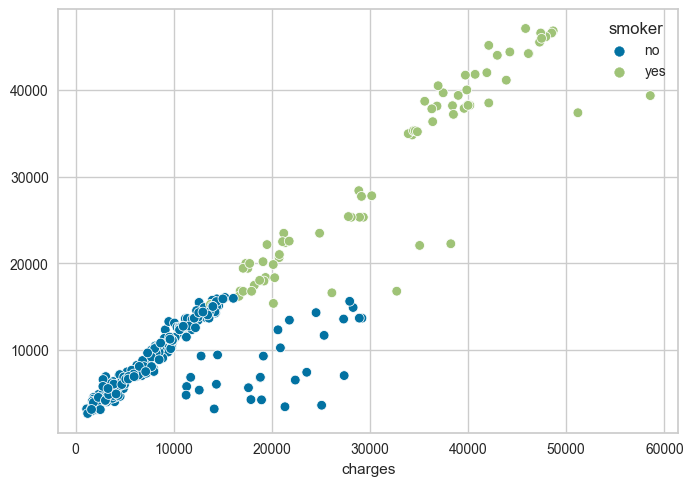

In [110]:
sns.scatterplot(x=y_test, y=y_pred, hue=X_test.smoker)

<Axes: >

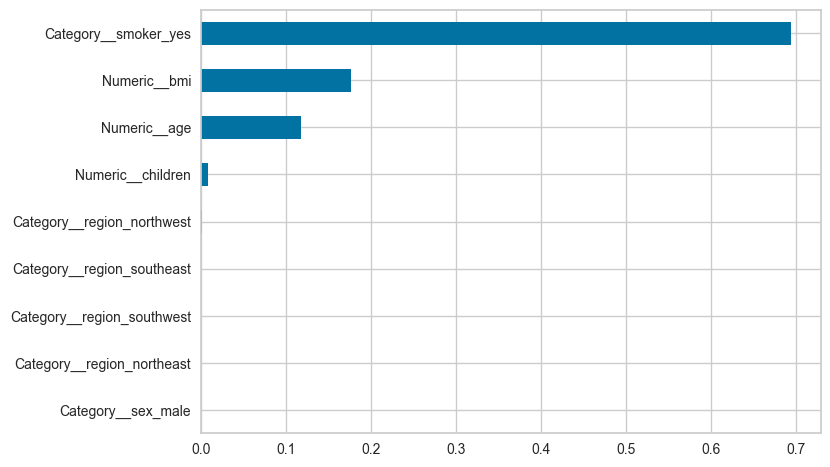

In [140]:
# É preciso acessar o pipeline pelo 'named_steps' e localizar o modelo. Depois disso podemos returar as importancias das features
(
    pd.Series(
    model_pipeline.named_steps['model'].feature_importances_,
    model_pipeline.named_steps['Preprocessamento'].get_feature_names_out()
    ).sort_values()
    .plot.barh()
)

Observamos que muitas features não são relevantes para o modelo, dessa forma, vamos reconstruir o nosso modelo retirando as features irrelevantes
Ou seja, vamos reconstruir o modelo sem as variáveis: Região e Sexo.

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'R2': 0.8664659032642603,
 'MAE': 2568.0246135359725,
 'MAPE': 0.2935393722520092}

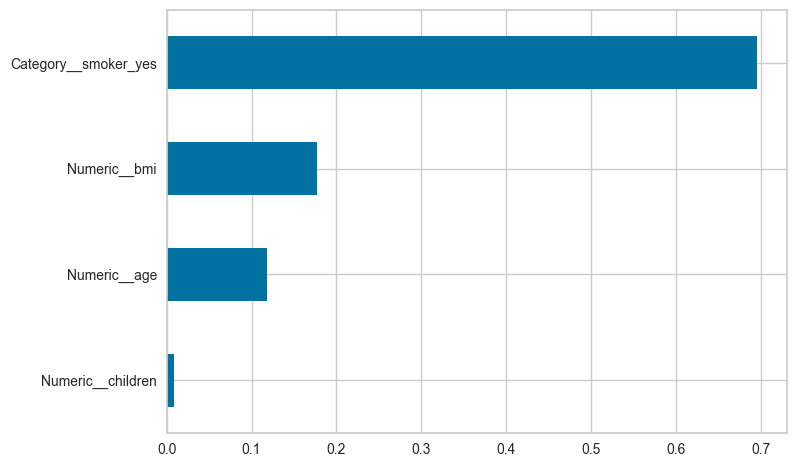

In [143]:
X = df.drop(columns=(['charges', 'region', 'sex']))
y = df['charges']

categorical_features = ['smoker']
numerical_features = [col for col in list(X.columns) if col not in categorical_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023)

numerical_transformer = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean')),
    ('Scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='most_frequent')),
    ('Encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('Numeric', numerical_transformer, numerical_features),
    ('Category', categorical_transformer, categorical_features)
])

model_pipeline = Pipeline([
    ('Preprocessamento', preprocessor),
    ('model', GradientBoostingRegressor(random_state=2023))
])

params = {
    'model__learning_rate': [0.1, 0.01],
    'model__max_depth': [3, 4, 5],
    'model__n_estimators': [300, 400, 500],
    'model__subsample': [1.0, 0.8]
}

grid_model = GridSearchCV(model_pipeline, params, cv=5, scoring='r2', n_jobs=-1 ,verbose=1)
grid_model.fit(X_train, y_train)

model_pipeline = grid_model.best_estimator_
y_pred = model_pipeline.predict(X_test)


(
    pd.Series(
    model_pipeline.named_steps['model'].feature_importances_,
    model_pipeline.named_steps['Preprocessamento'].get_feature_names_out()
    ).sort_values()
    .plot.barh()
)


get_metrics(y_test, y_pred)

In [146]:
with open ('./models/model.pkl', 'wb') as file_model:
    pickle.dump(model_pipeline, file_model)